### HC701 Assignment #1 - Task 3
Jinhong Wang 23010447

#### Compute PSNR between the two frames on each video. Report the code and the name of the video with the highest PSNR.

In [1]:
import os
import cv2
import numpy as np
import pandas as pd


def load_video(video_path: str):

    frames = []
    cap = cv2.VideoCapture(video_path)
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()

    return frames

highest_psnr = 0.0
highest_psnr_video = None

print("Video Filename \t PSNR Value")

infotable = pd.read_csv('Data/task_3/Frames.txt', sep=',')
# iterate by row
for index, row in infotable.iterrows():
    video_path = row['FN']
    video_frames = load_video(os.path.join('Data/task_3/', video_path))

    mse = np.mean((video_frames[row[" Frame1"]] - video_frames[row[" Frame2"]]) ** 2)
    max_pixel_value = np.max(video_frames[row[" Frame1"]])
    psnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))
    
    if psnr > highest_psnr:
        highest_psnr = psnr
        highest_psnr_video = video_path
    
    print(f'{video_path} \t {psnr}')

print("The video with the highest PSNR is", highest_psnr_video, "with a PSNR of", highest_psnr)


Video Filename 	 PSNR Value
video88.avi 	 30.360918385916023
video27.avi 	 31.18941931213338
video55.avi 	 31.562205810330397
video7.avi 	 30.402373804269892
video78.avi 	 32.16378682348804
The video with the highest PSNR is video78.avi with a PSNR of 32.16378682348804


#### Improve the quality on the first frame only (in Frames.txt) in each video by
- Add Salt and Pepper noise to 0.005 of pixels in each frame
- Then, add Speckle noise with a variance of 0.01 to the noisy frame
- Filter the noisy frames using 3 different filtering methods such as median, Gaussian, etc.…
- Compute SSIM between each video's reference frame (first frame ID in the text file) and the
filtered frame.
- Report your code and the experiments you did. Discuss briefly which filtering method
provided the best SSIM and why? **(See in the report)**

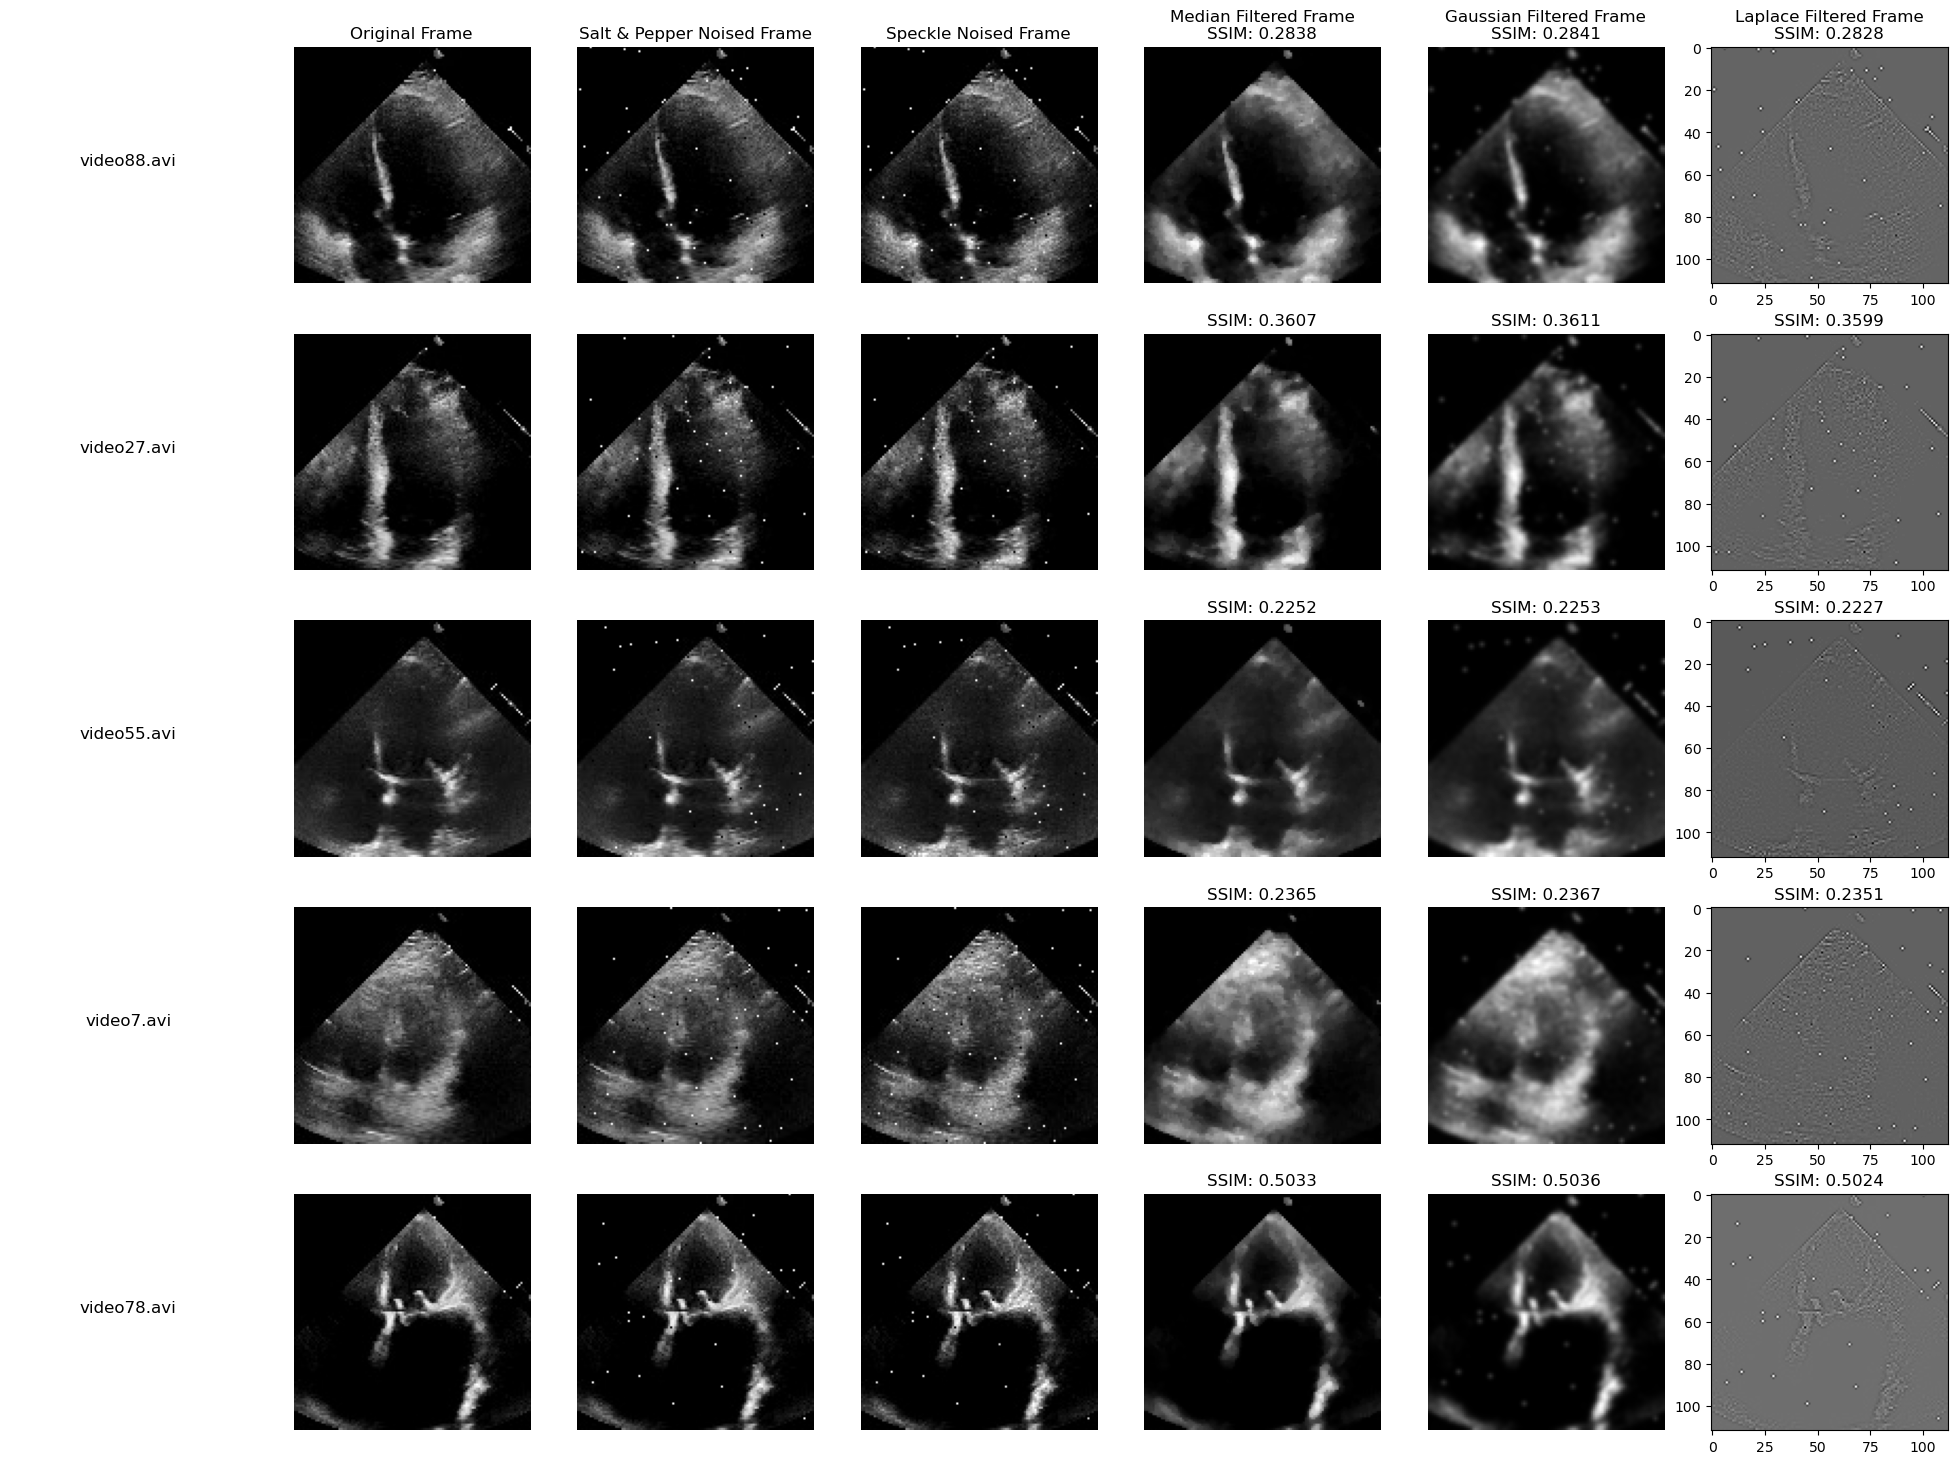

In [2]:
import skimage
import matplotlib.pyplot as plt

rownum = 0

plt.figure(figsize=(25, 18))

for index, row in infotable.iterrows():
    video_path = row['FN']
    video_frames = load_video(os.path.join('Data/task_3/', video_path))
    target_frame = video_frames[row[" Frame1"]]

    # As ultrasound images should be grayscale, I will convert the image to grayscale
    target_frame = cv2.cvtColor(target_frame, cv2.COLOR_RGB2GRAY)
    
    sp_frame = skimage.util.random_noise(target_frame, mode='s&p', amount=0.005)
    speckle_frame = skimage.util.random_noise(sp_frame, mode='speckle', var=0.01)

    median_frame = skimage.filters.median(speckle_frame)
    gaussian_frame = skimage.filters.gaussian(speckle_frame, sigma=1)
    laplace_frame = skimage.filters.laplace(speckle_frame, ksize=3)

    data_range = target_frame.max() - target_frame.min()

    medium_ssim = skimage.metrics.structural_similarity(target_frame, median_frame, data_range=data_range)
    gaussian_ssim = skimage.metrics.structural_similarity(target_frame, gaussian_frame, data_range=data_range)
    laplace_ssim = skimage.metrics.structural_similarity(target_frame, laplace_frame, data_range=data_range)

    plt.subplot(5, 7, rownum * 7 + 1)
    plt.text(0.5, 0.5, video_path, fontsize=12, ha='center')
    plt.axis('off')

    plt.subplot(5, 7, rownum * 7 + 2)
    plt.imshow(target_frame, cmap='gray')
    if rownum == 0:
        plt.title('Original Frame')
    plt.axis('off')

    plt.subplot(5, 7, rownum * 7 + 3)
    plt.imshow(sp_frame, cmap='gray')
    if rownum == 0:
        plt.title('Salt & Pepper Noised Frame')
    plt.axis('off')

    plt.subplot(5, 7, rownum * 7 + 4)
    plt.imshow(speckle_frame, cmap='gray')
    if rownum == 0:
        plt.title('Speckle Noised Frame')
    plt.axis('off')

    plt.subplot(5, 7, rownum * 7 + 5)
    plt.imshow(median_frame, cmap='gray')
    if rownum == 0:
        plt.title('Median Filtered Frame\nSSIM: %.4f' % medium_ssim)
    else:
        plt.title(f'SSIM: %.4f' % medium_ssim)
    plt.axis('off')

    plt.subplot(5, 7, rownum * 7 + 6)
    plt.imshow(gaussian_frame, cmap='gray')
    if rownum == 0:
        plt.title('Gaussian Filtered Frame\nSSIM: %.4f' % gaussian_ssim)
    else:
        plt.title(f'SSIM: %.4f' % gaussian_ssim)
    plt.axis('off')

    plt.subplot(5, 7, rownum * 7 + 7)
    plt.imshow(laplace_frame, cmap='gray')
    if rownum == 0:
        plt.title('Laplace Filtered Frame\nSSIM: %.4f' % laplace_ssim)
    else:
        plt.title(f'SSIM: %.4f' % laplace_ssim)

    rownum += 1

plt.show()